* This notebook is prepared by __Ahmed Saad El Fiky__. 
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\csqrttwo}[1]{\frac{#1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

### GHZ State
A Greenberger-Horne-Zeilinger (GHZ) state is an entangled quantum state having extremely non-classical properties.

For a system of $n$ qubits the __GHZ state__ can be written as:
$$ \ket{GHZ} = \frac{\ket0^{\otimes n} + \ket1^{\otimes n}}{\sqrt2}  $$

The simplest one is the 3-qubit GHZ state, which already exhibits non-trivial multipartite entanglement:$$ \ket{GHZ} = \frac{\ket{000} + \ket{111}}{\sqrt2}  $$
__GHZ states__ maximize entanglement monotones and therefore can be called __maximally entangled__ in multipartite sense.

The __W__ state is an entangled quantum state of three qubits, which has non-zero entanglement across any bipartition:
$$ \ket{W} = \frac{\ket{001} + \ket{010} + \ket{100}}{\sqrt3}  $$


In [1]:
# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from numpy import arccos, sqrt

In [2]:
# Define a function that take the number of input qubits and generate the GHZ State:

def GHZ(n):
    
    # Create the Quantum Circuit with n qubits:
    q = QuantumRegister(n,"|0>")
    qc = QuantumCircuit(q)
    
    # Display the input states:
    print(f"Input state = |{"0"*n}>")
    
    # Insert the entanglement circuit:
    qc.h(q[n-1])
    for i in range(n-1,0,-1):
        qc.cx(q[i], q[i-1])
    
    # Display the GHZ Circuit:
    display(qc.draw('mpl', reverse_bits= True, style='iqp'))
    
    # Display the output state:
    print(f"Output state |GHZ_{n}>=")
    display(Statevector(qc).draw("latex"))
    display(plot_state_qsphere(Statevector(qc)))

Input state = |000>


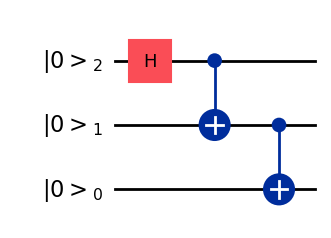

Output state |GHZ_3>=


<IPython.core.display.Latex object>

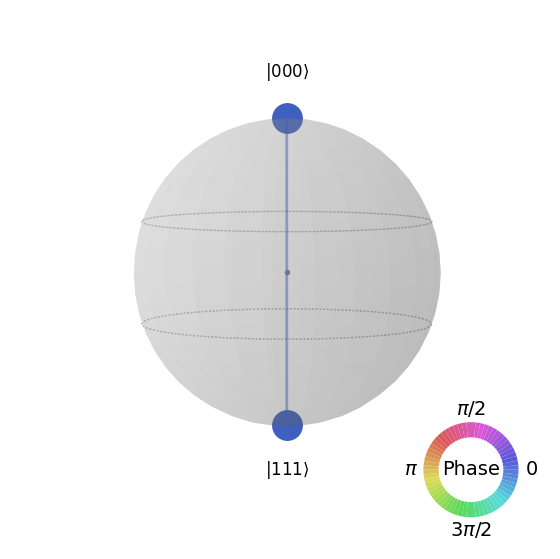

In [3]:
GHZ(3)

Input state = |0000>


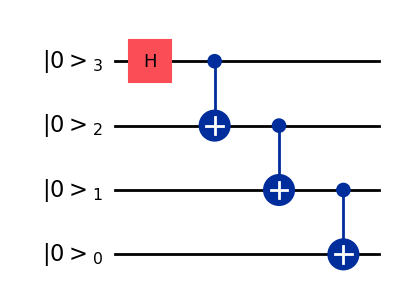

Output state |GHZ_4>=


<IPython.core.display.Latex object>

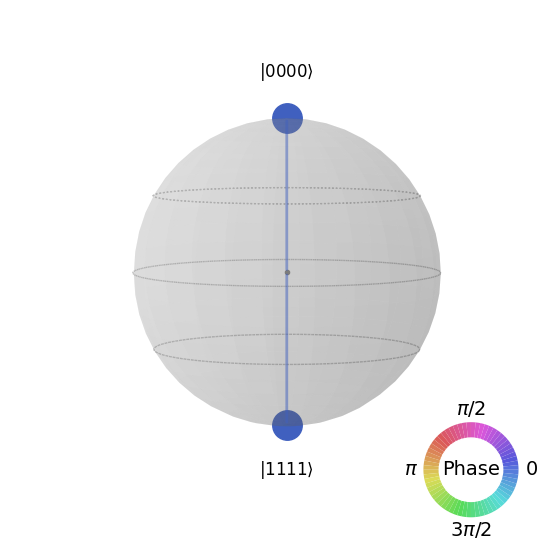

In [4]:
GHZ(4)

Input state = |00000>


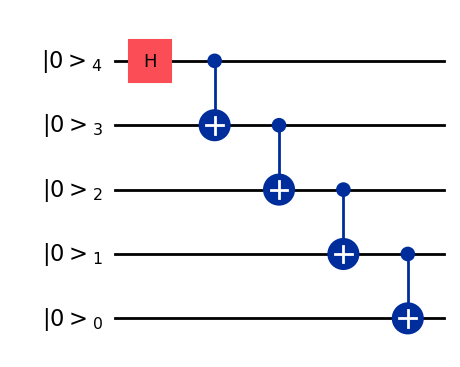

Output state |GHZ_5>=


<IPython.core.display.Latex object>

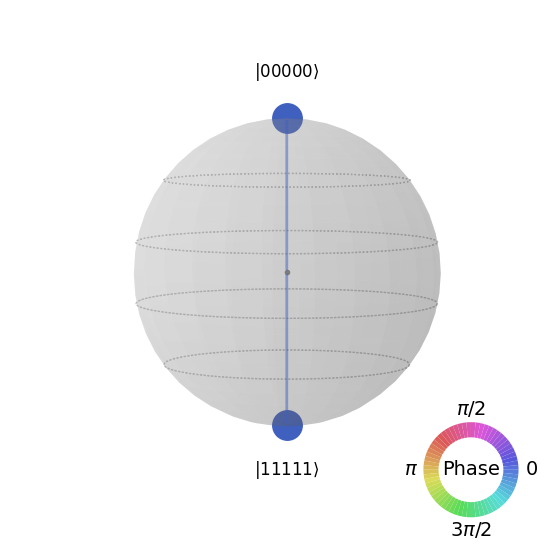

In [5]:
GHZ(5)

***

Input state = |000>


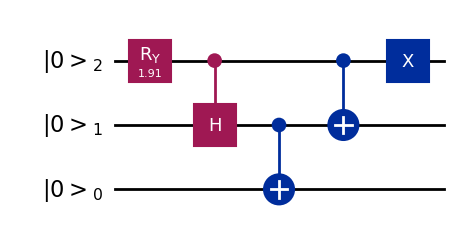

Output state |W_3>=


<IPython.core.display.Latex object>

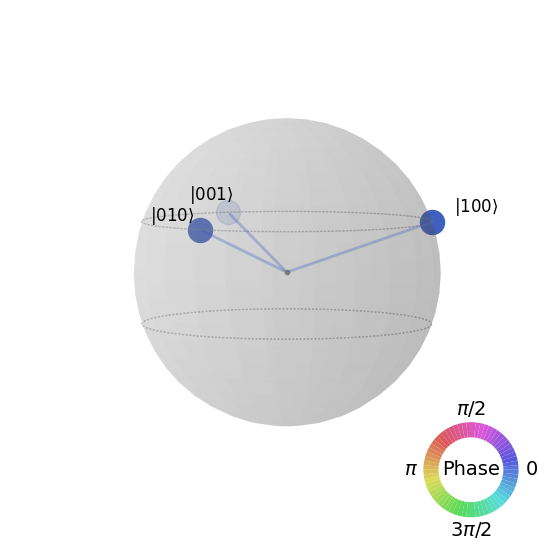

In [6]:
# Create the Quantum Circuit with 3 qubits:

n = 3
q = QuantumRegister(n,"|0>")
W = QuantumCircuit(q)

# Display the input states:
print(f"Input state = |{"0"*n}>")

# Insert the entanglement circuit:
W.ry( 2*arccos(1/sqrt(3)), q[2])    # Ry-rotation gate
W.ch(q[2], q[1])                    # Controlled Hadamard Gate
W.cx(q[1], q[0])                    # Controlled X-Gate
W.cx(q[2], q[1])
W.x(q[2])

# Display the W Circuit:
display(W.draw('mpl', reverse_bits= True, style='iqp'))

# Display the output state:
print(f"Output state |W_{n}>=")
display(Statevector(W).draw("latex"))
display(plot_state_qsphere(Statevector(W)))

***